# Ford GoBike System Data Exploration
##  by Wilfred Onsongo

## Introduction

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019.

## Preliminary Wrangling

> **Importing Packages and Loading The Dataset**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
!pip install seaborn --upgrade

In [3]:
# loading the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata1.csv')

> **Overall High-light of the Dataset, Shape and Composition**

In [49]:
# overview of the data
gobike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# investigating the shape of our dataset
gobike.shape

(183412, 16)

> This dataset consists of **183,412 Observations** and **16 Variables**

In [6]:
# investigating the data types for each variable
gobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

> The data types for some variables like **start_time, end_time, start_station_id, end_station_id, member_birth_year** and **member_gender** are wrong. 

> **Data Assessment**

In [7]:
# checking for duplicates in the dataset observations
gobike.duplicated().sum()

0

> There are **Nil** Duplicated Observations 

In [8]:
#investigating missing values for each variable
gobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# percentage of null entries for each variable
gobike.isnull().sum()/gobike.shape[0]*100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

> The **start_station_id, start_station_name, end_station_id** and **end_station_name** variables all have 197 missing values. I will extract them to investigate them further.

> There are also 8,265 entries that are missing the **member_birth_year** and **member_gender** variables.

In [10]:
# searching for any wrong entries
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


> The minimum value for the **member_birth_year** is off. I will investigate this variable further to see its range of values.

In [11]:
# value counts for member_birth_year variable
gobike['member_birth_year'].value_counts() 

member_birth_year
1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: count, Length: 75, dtype: int64

> We have multiple **member_birth_year** values that seem unrealistic as it is highly unlikely that a person with more than 100 years of age would participate in this project.

In [12]:
# investigating for categorical variables
gobike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

> The variables **user_type, member_gender** and **bike_share_for_all_trip** are categorical variables

> **Data Assessment Summary**

>1. The *data types* for the variables; **start_time, end_time, start_station_id, end_station_id, user_type, member_birth_year** and **bike_share_for_all_trip** are wrong.
>1. The **member_birth_year, member_gender, start_station_id, start_station_name, end_station_id** and **end_station_name** have *Missing Values*.
>1. Some **member_birth_year** values seem wrong.

> **Data Cleaning**

>I will create a copy of the original data before performing the cleaning actions for the above data issues that I have listed.

In [13]:
# Making a copy for the original dataset
gobike_clean = gobike.copy()

### Issue #1. Changing Data Types 

### Define

> The data types for; 
>- **start_time & end_time** are set to *object* instead of *datetime*,

>- **member_birth_year, start_station_id, & end_station_id** are set to *float* instead of *str*,

>- **user_type, member_gender & bike_share_for_all_trip** are set to *object* insted of *categorical*.

### Code

In [14]:
# import datetime package
import datetime

In [15]:
# converting to datetime
gobike_clean['start_time'] = pd.to_datetime(gobike_clean['start_time'])
gobike_clean['end_time'] = pd.to_datetime(gobike_clean['end_time'])

#converting to int
gobike_clean[['member_birth_year']] = gobike_clean[['member_birth_year']].astype(float)
gobike_clean['start_station_id'] = gobike_clean['start_station_id'].astype(str)
gobike_clean['end_station_id'] = gobike_clean['end_station_id'].astype(str)

#converting to category
gobike_clean['bike_share_for_all_trip'] = gobike_clean['bike_share_for_all_trip'].astype('category')
gobike_clean['member_gender'] = gobike_clean['member_gender'].astype('category')
gobike_clean['user_type'] = gobike_clean['user_type'].astype('category')

### Test

In [16]:
# dataset info summary
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

> All the variables are set to the appropriate data types.

### Issue #2. Missing Values 

### Define

> Two categories of variables have missing values; 
>- **start_station_name & end_station_name** variables lack entries in 0.11% of their observations.

>- **member_birth_year & member_gender** variables lack entries in 4.5% of their entries.

### Code

In [17]:
# checking to see if the start stations with no names concide with the end stations with no names.
gobike_clean[gobike_clean.start_station_name.isna() & gobike_clean.end_station_name.notna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


> All the the observations without values for **start_station_name** are the same as the ones without **end_station_name** values

> Since these stations can be referred by their **co-ordinates** or **station ids**, we can ignore these observations.

In [18]:
# checking if the observations without member_gender values concide with those without member_birth_year
gobike_clean[gobike_clean.member_gender.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


> Since I will be using the **Age** and **Gender** variables in my analysis of this dataset, I will drop all these rows that have missing values and considering they they are only 4.5% of the data, their effect won't be as much. 

In [19]:
# converting nan to NaN for uniformity
gobike_clean['member_birth_year'] = gobike_clean['member_birth_year'].replace(['nan'], 'NaN')

In [20]:
# confirming the conversion
gobike_clean[gobike_clean.member_gender.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [21]:
# deleting rows with no values for member_gender and member_birth_year
gobike_clean.dropna(subset=['member_gender', 'member_birth_year'], inplace=True)

In [22]:
gobike_clean[['member_birth_year']] = gobike_clean[['member_birth_year']].astype(int)

In [23]:
#confirming we have no null values in our dataset.
gobike_clean[['member_birth_year', 'member_gender']].isna().sum()

member_birth_year    0
member_gender        0
dtype: int64

### Test

In [24]:
# dataset info summary
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         175147 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           175147 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  int64         
 12  user_type            

> All the variables are set to the appropriate data types.

### Dataset Structure

> My dataset has **175,147 observations** and **16 variable**; in which **3 are categorical**, **2 are of datetime** data type, **4 are floats**, **5 are of object** type, and **2 are integers**.

### Main Feature of Interest

> The main variable that I will be using in this analsyis will be **duration_sec** and the **number of rides**

### Support Features

> The features that I will be using to analyze this dataset are **time** hourly,daily, weekly distribution of rides, **user_type**, **age**, **age_group**, **member_gender**, **bike_share_for_all_trip**.

## Univariate Exploration
> In this section I will investigate the distribution of individual variables of interest to enable me understand the dataset more. 


### Ride Duration

>**Define**

> I want to investigate the average time taken to complete a trip by investigating the **duration_sec** variable

>**Investigate**

In [25]:
# change duration_sec from seconds to minutes
gobike_clean['duration_min'] = gobike_clean['duration_sec']/60

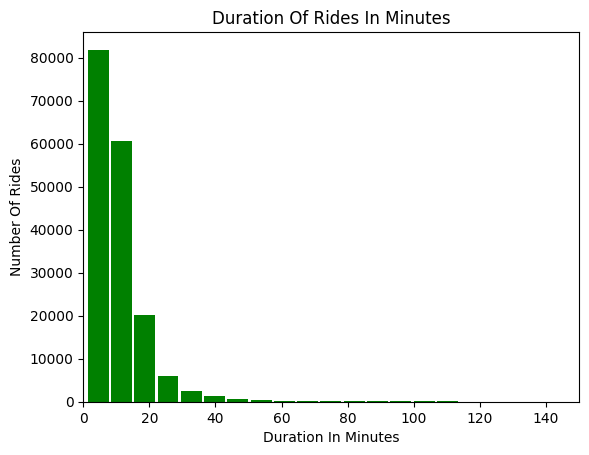

In [26]:
#Distribution of duration of rides
data = gobike_clean['duration_min']
plt.hist(data , bins = 200 , rwidth=.9, color='green')
plt.xlim(0,150)
plt.title('Duration Of Rides In Minutes')
plt.xlabel('Duration In Minutes')
plt.ylabel('Number Of Rides');

>**Observation**

> We had rides taking outlier durations of more than 50 minutes. However, most rides took below 20 minutes. 

### Busiest hour of the day

>**Define**

> I will investigate the **start_time** variable to determine the distribution of the times when riders take the rides most.

>**Investigate**

In [27]:
# calculating the hourly rides
hourly_count = gobike_clean.groupby(gobike_clean.start_time.dt.hour).duration_min.count()
hourly_count = hourly_count.rename_axis('hour').reset_index(name='count')
daily_hours = [00, '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']

C:\Users\USER\AppData\Local\Temp\ipykernel_16176\2964423566.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels = daily_hours,


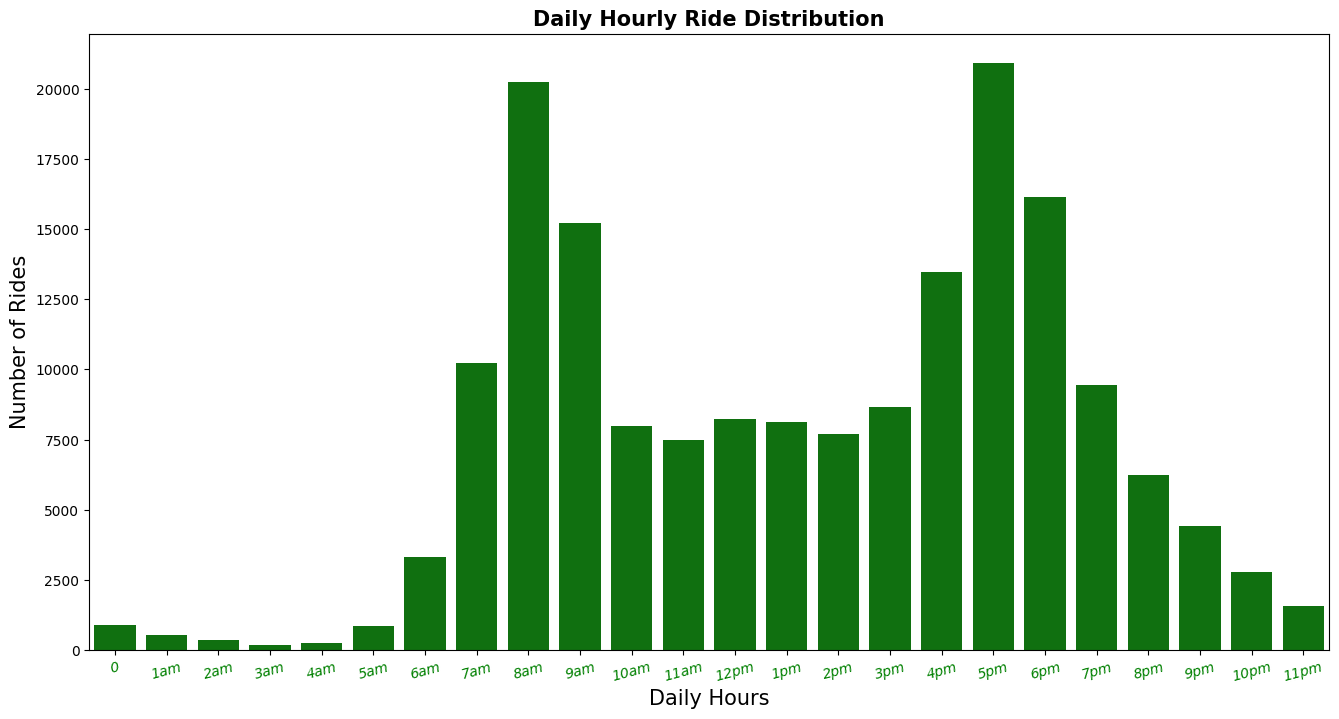

In [28]:
# plot
plt.figure(figsize=(16,8 ))
plot = sb.barplot(data=hourly_count, x='hour', y='count', color='green')
plot.set_title('Daily Hourly Ride Distribution', fontdict={'size': 15, 'weight': 'bold'})
plot.set_xlabel('Daily Hours', fontdict={'size': 15})
plot.set_xticklabels(labels = daily_hours, 
                   rotation=15, 
                   fontstyle='italic', 
                   color='green')
plot.set_ylabel('Number of Rides', fontdict={'size': 15})
plt.show()

>**Observation**

> From the graph we can see that most rides were taken between **7am and 9am** in the morning and in the evening between **4pm and 7pm** making our graph to be bimodially distributed. 

### Busiest Day of the Week

>**Define**

> Let me look into the frequency of their bike usage within the days of the week.

>**Investigate**

In [29]:
# calculating the weekly rides
weekly_count = gobike_clean.groupby(gobike_clean.start_time.dt.weekday).duration_min.count()
weekly_count = weekly_count.rename_axis('weekday').reset_index(name='count')
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',  'Sunday']

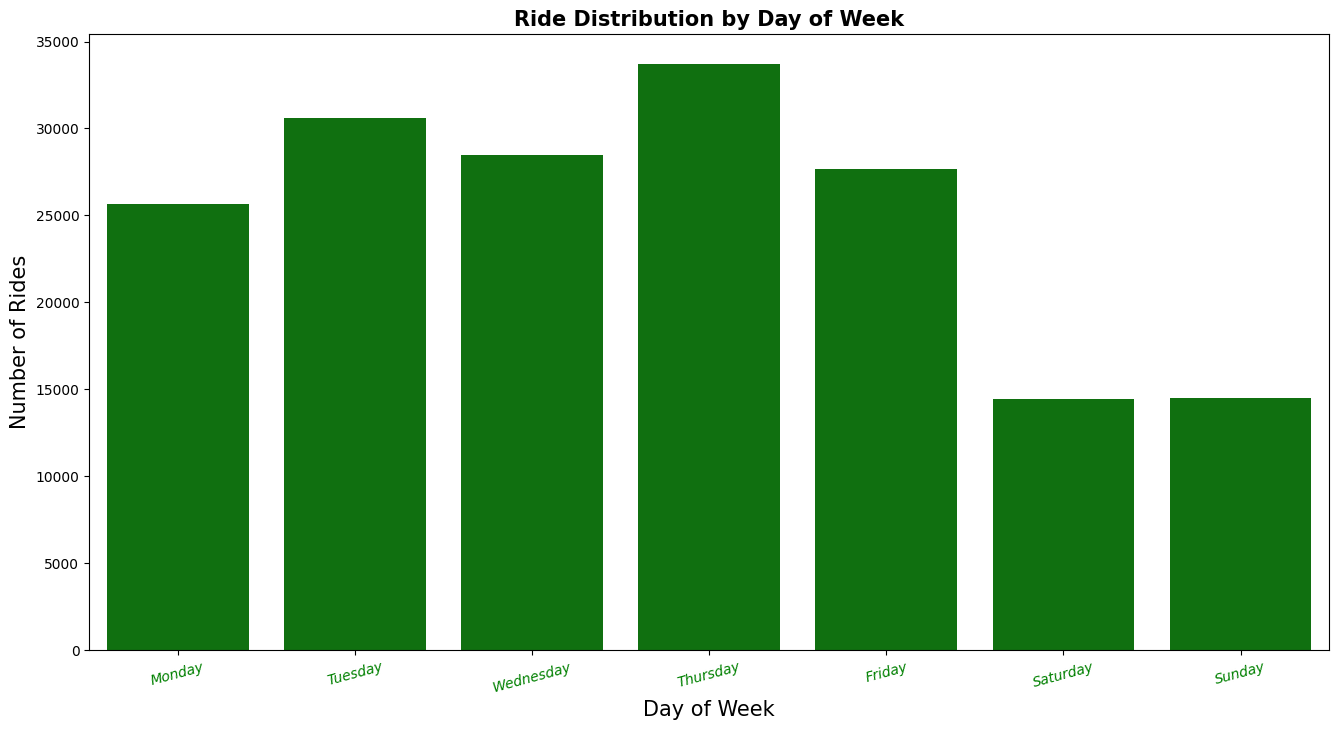

In [30]:
# drawing the graph
plt.figure(figsize=(16,8 ))
plot = sb.barplot(data=weekly_count, x='weekday', y='count', color='green')
plot.set_title('Ride Distribution by Day of Week', fontdict={'size': 15, 'weight': 'bold'})
plot.set_xticks(ticks=weekly_count.index)
plot.set_xlabel('Day of Week', fontdict={'size': 15})
plot.set_xticklabels(labels = day_names, 
                   rotation=15, 
                   fontstyle='italic', 
                   color='green')
plot.set_ylabel('Number of Rides', fontdict={'size': 15})
plt.show()

>**Observation**

> Week days had more bike rides than Weekends. Thursday had the highest bike rides and Saurday and Sunday had the lowest. 

### Distribution of my Categorical Variables

>**Define**

> Let me look into the distribution of **user_type, member_gender, and bike_share_for_all_trip** variables.

>**Investigate**

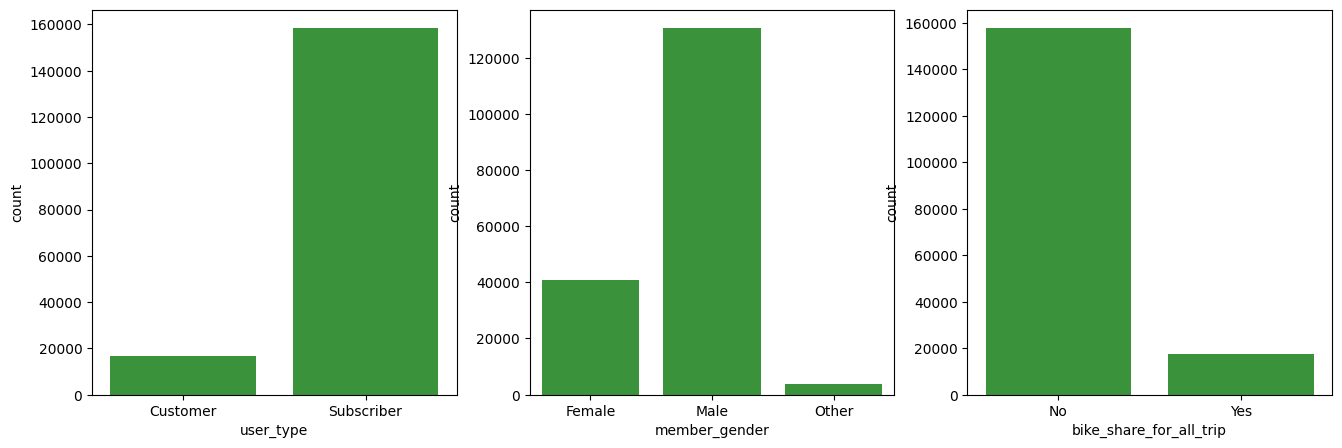

In [31]:
# let's plot all three together to get an idea of each categorical variable's distribution.

fig, ax = plt.subplots(1,3, figsize = [16,5])

default_color = sb.color_palette()[2]
sb.countplot(data = gobike_clean, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = gobike_clean, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = gobike_clean, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

plt.show()

>**Observation**

> **subsciber**, **Male** and **No Bike_sharing** users were the majority of users in their respective categories. 

### Gender Percentages for users

>**Define**

> I will look at the proportion of **member_gender** for each type of user.

>**Investigate**

In [32]:
# gender value counts
gender_counts = gobike_clean['member_gender'].value_counts()/gobike_clean['member_gender'].value_counts().sum()

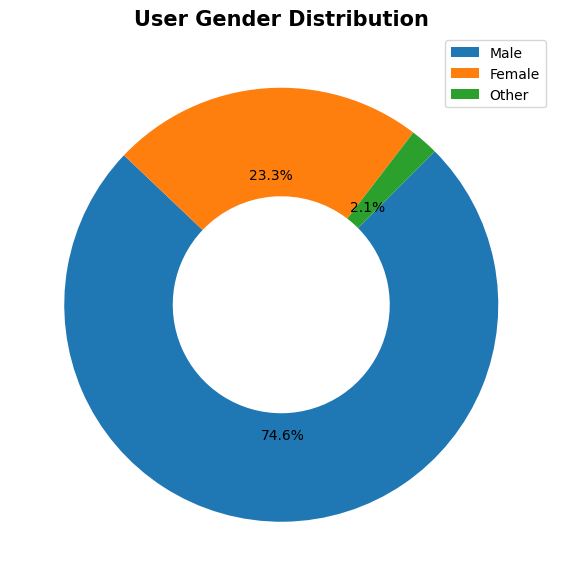

In [33]:
# Plot
plt.figure(figsize=(7,10 ))
plt.title('User Gender Distribution', fontdict={'size': 15, 'weight': 'bold'})
plt.pie(gender_counts, autopct='%1.1f%%', 
    startangle=45,
    counterclock=False, wedgeprops = {'width' : 0.5});
plt.legend(gender_counts.index);

>**Observation**

> Most riders were **Male**(75%) and 2.1% of the users did not record their gender. 

### User Type Percentages

>**Define**

> I will look at the proportion of **user_type** for each type of user.

>**Investigate**

In [34]:
# getting the count of user type values
member_counts = np.round(gobike_clean['user_type'].value_counts(normalize=True) * 100, 2)

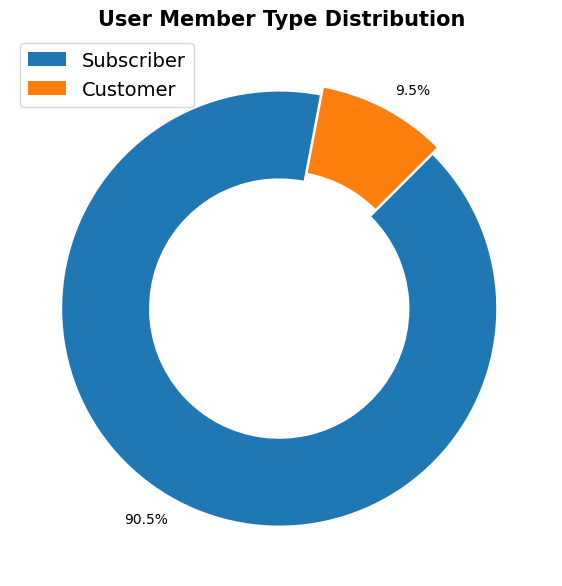

In [35]:
# Plot
plt.figure(figsize=(7,10 ))
plt.title('User Member Type Distribution', fontdict={'size': 15, 'weight': 'bold'})
plt.pie(member_counts, labels=[f"{str(x)}%" for x in member_counts.values],
        startangle=45, explode=np.repeat(0.02, len(member_counts.index)),
        counterclock=False, wedgeprops = {'width' : 0.4});
plt.legend(member_counts.index, fontsize=14);

>**Observation**

> Most riders were **Subscriber** accounting for more than 90%

### Bike Share Percentages

>**Define**

> I will look at the proportion of **bike_share_for_all_trip** for all users.

>**Investigate**

In [36]:
# getting the count of user type values
bikeshare_counts = np.round(gobike_clean['bike_share_for_all_trip'].value_counts(normalize=True) * 100, 2)

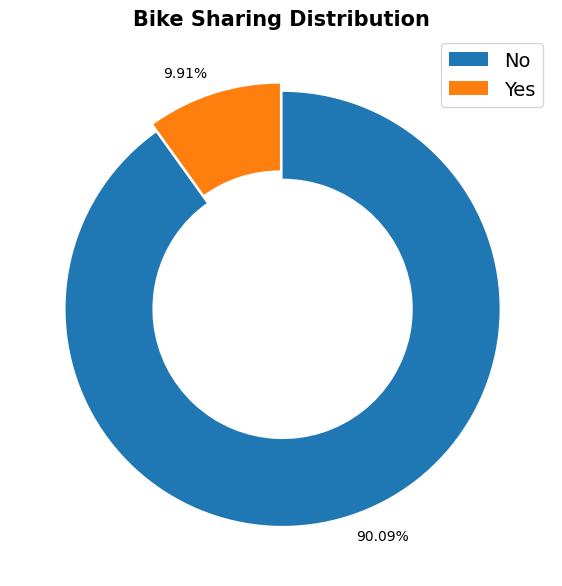

In [37]:
# Plot
plt.figure(figsize=(7,10 ))
plt.title('Bike Sharing Distribution', fontdict={'size': 15, 'weight': 'bold'})
plt.pie(bikeshare_counts, labels=[f"{str(x)}%" for x in bikeshare_counts.values],
        startangle=90, explode=np.repeat(0.02, len(bikeshare_counts.index)),
        counterclock=False, wedgeprops = {'width' : 0.4});
plt.legend(bikeshare_counts.index, fontsize=14);

>**Observation**

> **90%** of the users did not share their ride.

### How are the users Distributed according to their Age?

>**Define**

> I am going to create an **age** variable from the **member_birth_year** variable and determine how the user's age distribution.I will also categorize the ages into **age_groups** and I will delete the **member_birth_year**

>**Investigate**

In [38]:
# creating a new age variable 
gobike_clean['age'] = 2019 - gobike_clean['member_birth_year']

# defining the range for the age group
bins = list(range(10, 110, 10))
# append the max item to bins
bins.append(gobike_clean.age.max())

# defining group labels
labels = [f"{str(group)}s" for group in bins[:-1]]

In [39]:
# categorizing the ages
gobike_clean["age_group"] = pd.cut(gobike_clean.age, bins=bins, labels=labels)

# check the age group
gobike_clean.age_group.value_counts()

age_group
20s     70115
30s     63886
40s     22050
50s     11326
10s      4240
60s      2955
70s       383
80s       115
100s       72
90s         5
Name: count, dtype: int64

In [40]:
# deleting the `member_birth_year` variable
gobike_clean.drop(columns='member_birth_year', inplace=True)

# check if the dropping worked
gobike_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,869.750000,35,30s
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,1030.900000,47,40s
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,608.166667,30,20s
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,26.416667,45,40s
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,29.883333,60,50s


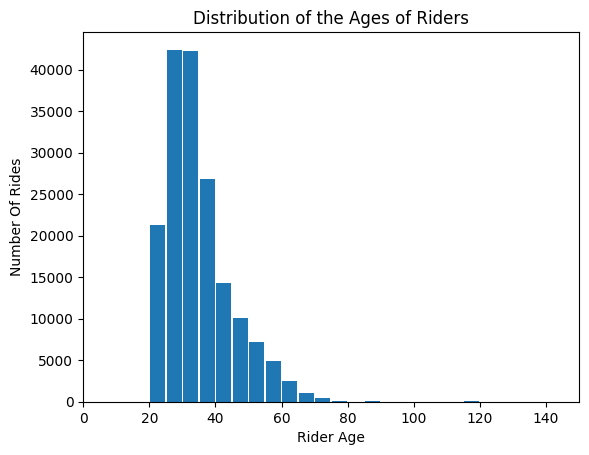

In [41]:
#Distribution of user ages
data = gobike_clean['age']
plt.hist(data , bins = range(20, gobike_clean.age.max() + 5, 5) , rwidth=.9)
plt.xlim(0,150)
plt.title('Distribution of the Ages of Riders')
plt.xlabel('Rider Age')
plt.ylabel('Number Of Rides');

>**Observation**

> Most riders were aged between 20-60 years. There were outlier ages for riders above 100 years

### Summary of the Distribution of My Variables of Interest

> Here is how my variables were distributed.
> - We had rides taking outlier **durations** of more than 50 minutes. However, most rides took below 20 minutes.
> - Most rides were taken between 7am and 9am in the morning and in the evening between 4pm and 7pm.
> - Week days had more bike rides than Weekends. Thursday had the highest bike rides and Saurday and Sunday had the lowest.
> - Most riders were Male(75%) and 2.1% of the users did not record their gender.
> - Most riders were customers accounting for more than 90%.
> - Most riders were aged between 20-60 years. There were outlier ages for riders above 100 years.


### Modifications to my Variables of Interest

> I had to calculate the **age** variable from **member_birth_year**, convert **duration_sec** to minutes, calculate **hourly_count, daily_count** features to visualize the distribution of rides according to thise features.

## Bivariate Exploration

> In this section I will look into the rrelationship between pairs of the single variables that I investigated in the above section(Univariate Exploration).

### User type vs Ride duration Relationship

> **Define**

> Here I will graph the relationship between the user type and the duration they took for their ride to see if there is any relationship between the two variables.

> **Investigate**

C:\Users\USER\AppData\Local\Temp\ipykernel_16176\4136987945.py:2: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.15`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sb.violinplot(data=gobike_clean, x='user_type', y='duration_min', inner="quartile", bw=.15)


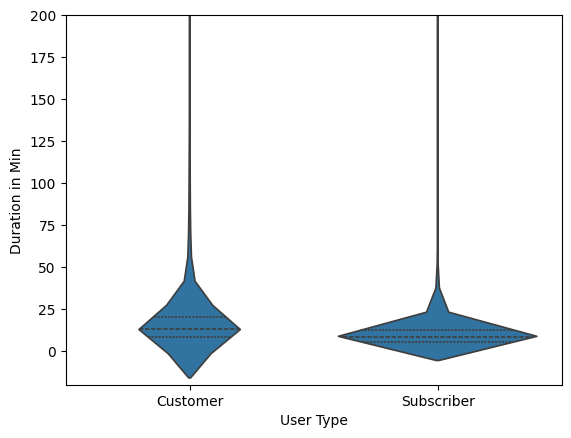

In [42]:
#violin Plot
sb.violinplot(data=gobike_clean, x='user_type', y='duration_min', inner="quartile", bw=.15)
plt.ylim((-20, 200))
plt.xlabel("User Type")
plt.ylabel("Duration in Min");

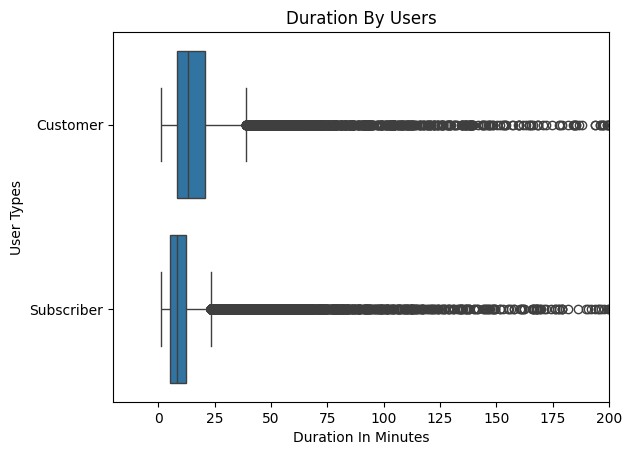

In [43]:
#Boxplot
sb.boxplot(data=gobike_clean, x='duration_min', y='user_type')
plt.xlim(-20, 200)
plt.title('Duration By Users')
plt.xlabel('Duration In Minutes')
plt.ylabel('User Types');

> **Observation**

> On average **customer** users had a higher ride duration than **Subscribers**.

### Relationship between User Type and the Day of the Week Number of Rides

> **Define**

> I will graph the comparision between the day of the week number of rides per customer type.

> **Investigate**

C:\Users\USER\AppData\Local\Temp\ipykernel_16176\2418644002.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_count = gobike_clean.groupby([gobike_clean.start_time.dt.weekday, 'user_type']).duration_min.count()


C:\Users\USER\AppData\Local\Temp\ipykernel_16176\2418644002.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels = day_names,


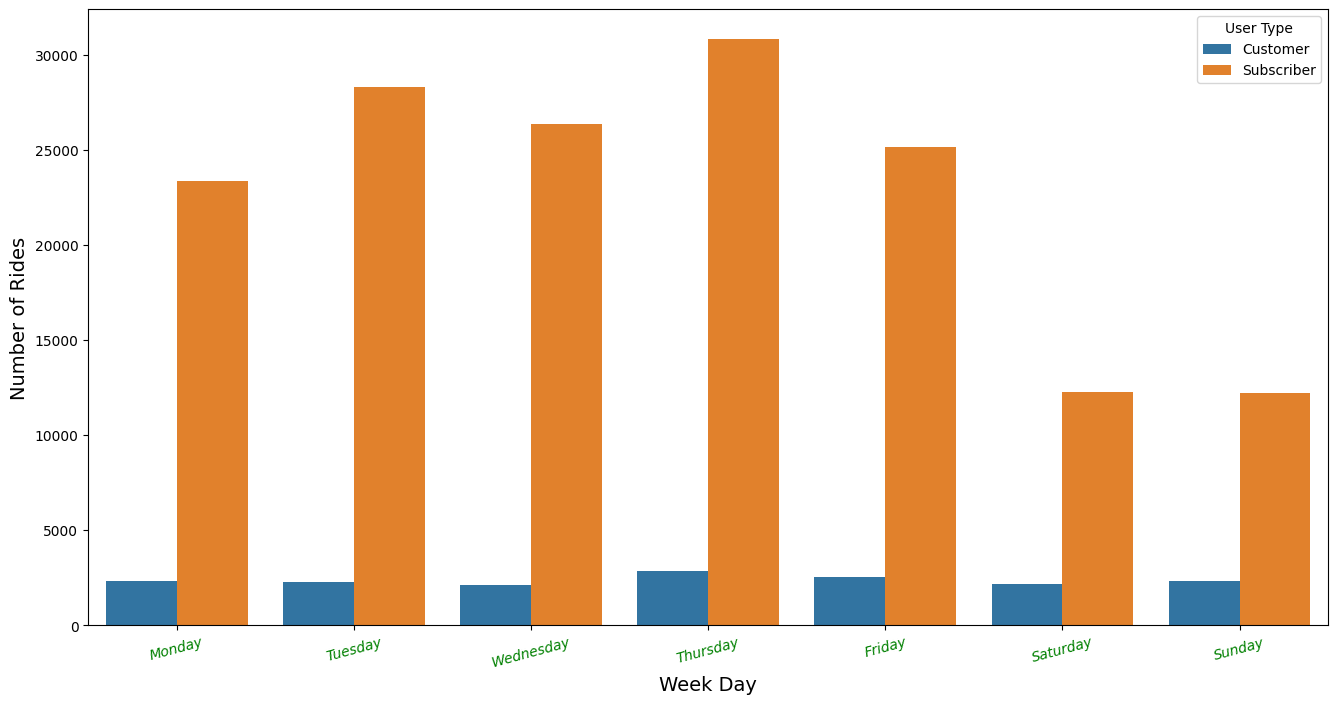

In [44]:
# calculating the Weekday rides
weekly_count = gobike_clean.groupby([gobike_clean.start_time.dt.weekday, 'user_type']).duration_min.count()
weekly_count = weekly_count.reset_index(name='count')
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',  'Sunday']

# drawing the graph
plt.figure(figsize=(16,8 ))
plot.set_title('Day of the Week User Type Ride Distribution', fontdict={'size': 15, 'weight': 'bold'})
plot = sb.barplot(data=weekly_count, x='start_time', y='count', hue='user_type')
plot.set_xlabel("Week Day", fontsize=14)
plot.set_xticklabels(labels = day_names, 
                   rotation=15, 
                   fontstyle='italic', 
                   color='green')
plot.set_ylabel("Number of Rides", fontsize=14)
plt.legend(title="User Type");

> **Observation**

> Whereas the number of daily rides for **Customers** were almost constant, the daily rides for **subscriber** were high on weekdays, and low during the weekend and they peaked on Thursday.

### User Type Vs Age Relationship

> **Define**

> I will investigate the age distributions of the different user types.

> **Investigate**

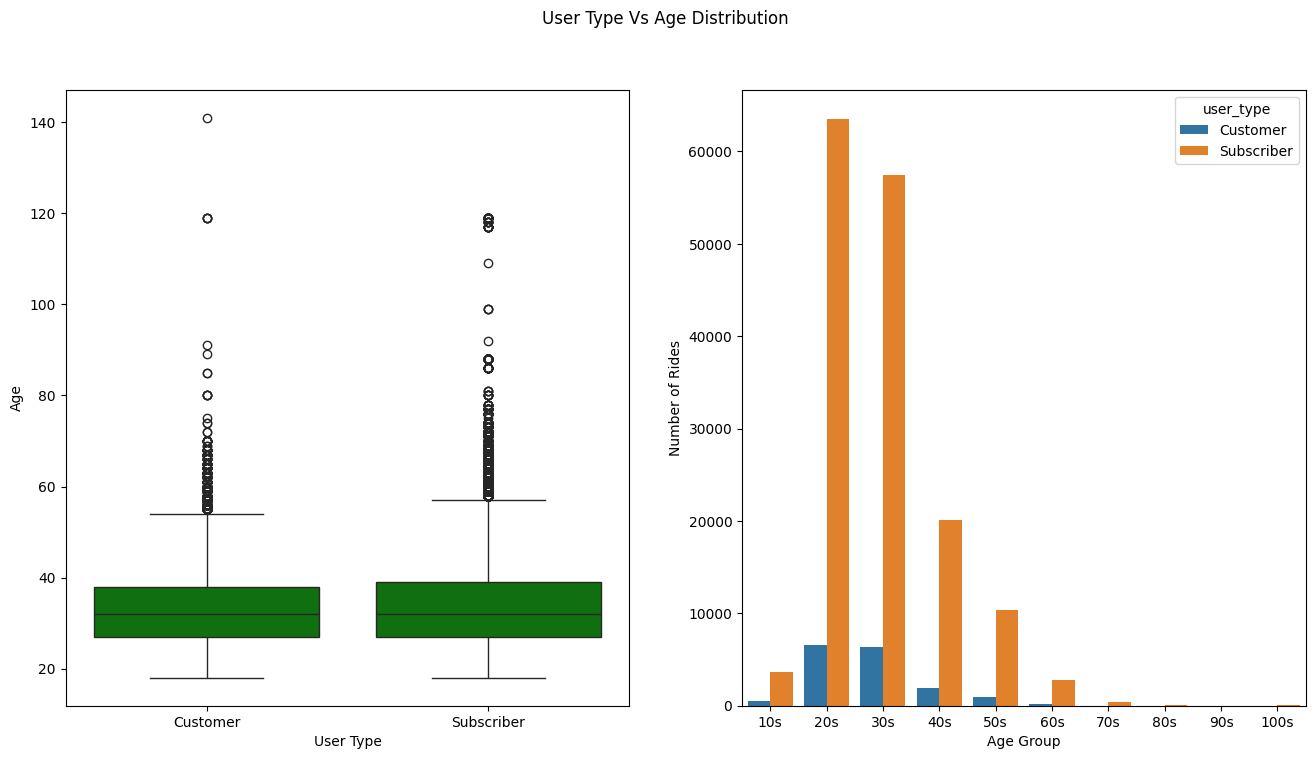

In [45]:
# plotting the graph
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

plt.suptitle("User Type Vs Age Distribution")

sb.boxplot(data=gobike_clean, x='user_type', y='age', color='green', ax=ax[0])
ax[0].set_xlabel("User Type")
ax[0].set_ylabel("Age")

sb.countplot(data=gobike_clean, x='age_group', hue="user_type", ax=ax[1])
plt.xlabel("Age Group")
plt.ylabel("Number of Rides");

> **Observation**

> **customer** users had fewer rides per age group than **subscriber** users but they had the largest outlier **ages**.

### Bivariate Analysis Summary

> Here is a summary of the analysis above;

> - On average **customer** users have a higher ride duration than **subscriber** users.
> - Whereas the number of daily rides for **customer** users were almost constant, the daily rides for **subscriber** were high on weekdays, and low during the weekend and they peaked on Thursday.
> - **customer** users had fewer rides per an **age group** than **subscriber** users but they had the largest outlier ages.



## Multivariate Exploration

> In this I will explore relationships of 3 or more variables.

### Relationship between Gender, Age and the User Type.

> **Define**

> I will graph the three variable to see if there is any relationship between them.

> **Investigate**

C:\Users\USER\AppData\Local\Temp\ipykernel_16176\1083671276.py:4: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.15`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  plot = sb.violinplot(data=gobike_clean, x='member_gender', y='age', hue="user_type", bw=.15)


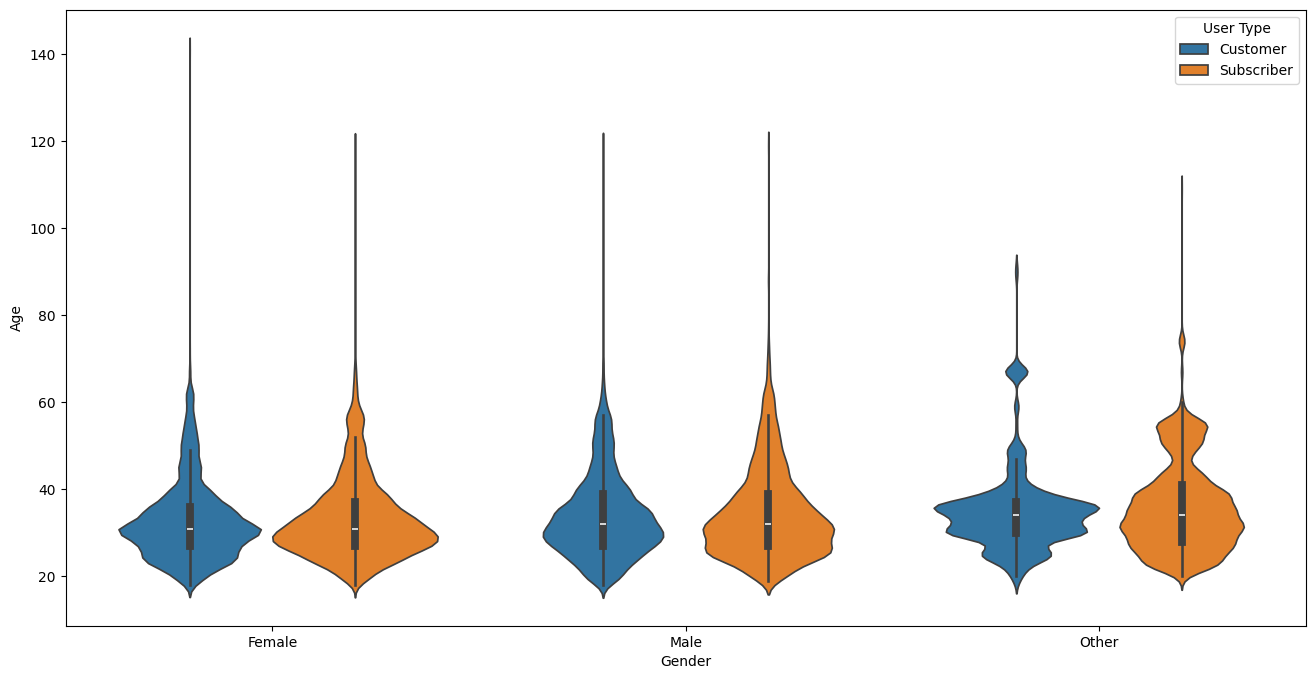

In [46]:
#Plot
plt.figure(figsize=(16,8 ))
plot.set_title('Gender, Age, and User Type Distribution', fontdict={'size': 15, 'weight': 'bold'})
plot = sb.violinplot(data=gobike_clean, x='member_gender', y='age', hue="user_type", bw=.15)
plt.xlabel("Gender")
plt.ylabel("Age")
plt.legend(title="User Type");

> **Observation**

> The 3rd quartiles for the **female** and **other** users were different between their **customer** and **subscriber** user types. The **Female** users have the most aged outlier users.

### Distribution of the Average number of Rides over the days of the week by Gender.

> **Define**

> I will graphically illustrate the ride durations for the various gender over the days of the week.

> **Investigate**

C:\Users\USER\AppData\Local\Temp\ipykernel_16176\3541513564.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_count = gobike_clean.groupby([gobike_clean.start_time.dt.weekday, 'member_gender']).duration_min.count()
C:\Users\USER\AppData\Local\Temp\ipykernel_16176\3541513564.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels = day_names,


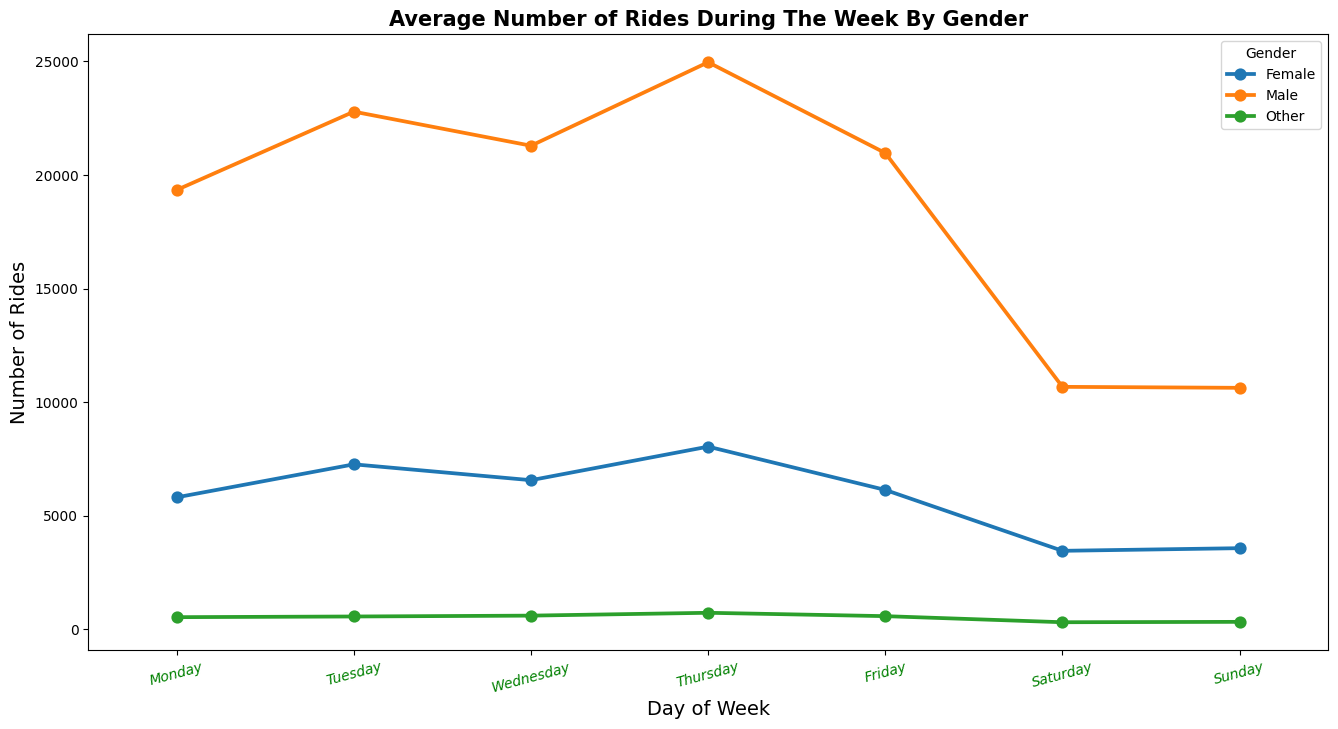

In [47]:
# calculating the Weekday rides
weekly_count = gobike_clean.groupby([gobike_clean.start_time.dt.weekday, 'member_gender']).duration_min.count()
weekly_count = weekly_count.reset_index(name='count')
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',  'Sunday']

#plot
plt.figure(figsize=(16,8 ))
plot = sb.pointplot(data=weekly_count, x='start_time', y='count', hue='member_gender')
plot.set_title('Average Number of Rides During The Week By Gender', fontdict={'size': 15, 'weight': 'bold'})
plot.set_xlabel("Day of Week", fontsize=14)
plot.set_xticklabels(labels = day_names, 
                   rotation=15, 
                   fontstyle='italic', 
                   color='green')
plot.set_ylabel("Number of Rides", fontsize=14)
plt.legend(title="Gender");

> **Observation**

> We can Observe that **Male** users had the most number of rides every day of the week and their rides varied the most from day to day.**Female** users had lesser rides and their daily variability was lesser and the **other** user had the least daily rides with the least variability.

### Relationship between the Duration of Ride and the User Age for every day of the week.

> **Define**

> I will investigate the relationship between the duration of rides and the Age of users over each day of the week.

> **Investigate**

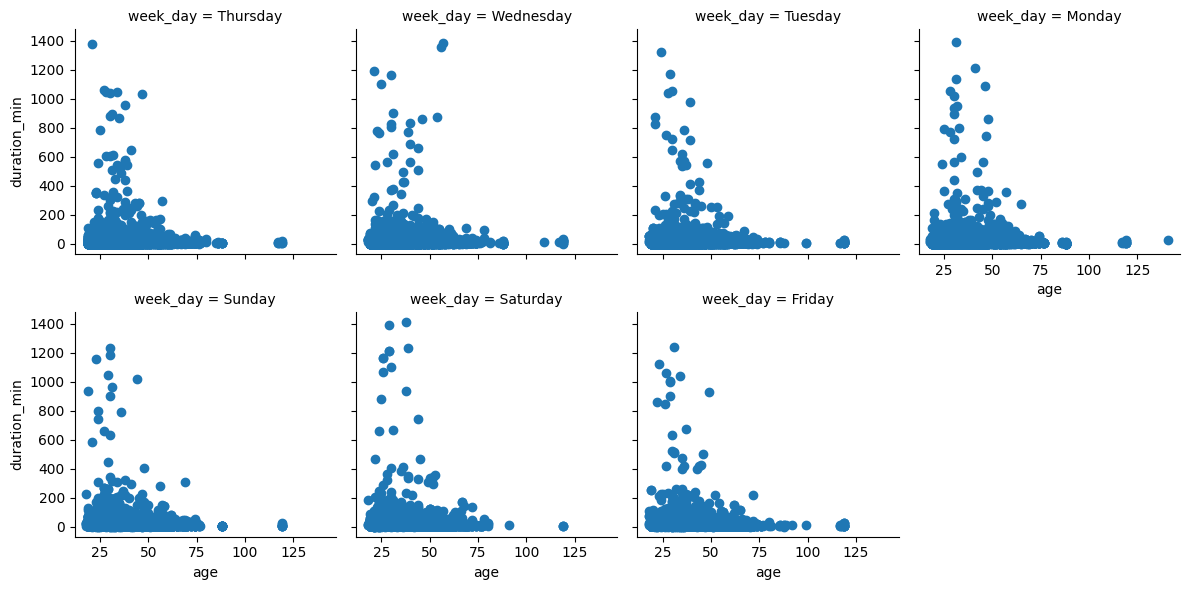

In [48]:
# plot a scatterplot for every day of week.
gobike_clean['week_day'] = gobike_clean['start_time'].dt.day_name()
g = sb.FacetGrid(data=gobike_clean, col ='week_day', col_wrap = 4)
g.map(plt.scatter, 'age','duration_min');

> **Observation**

> It can be observed that generally, the number of rides taken by users decrease with age for all the days of the week. It can also be observed that it's the younger users that take the longest rides for each day of the week.

### Multivariate Analysis Summary.

> From the analysis of more than two variables, the following relationship observations were made;
> - The 3rd quartile values for the **female** and **other** users are different between their **customer** and **subscriber** user types. The **Female** users have the most aged outlier users.
> - **Male** users had the most number of rides every day of the week and their rides varied the most from day to day.**Female** users had lesser rides and their daily variability was lesser and the **other** user had the least daily rides with the least variability.
> - Generally, the **number of ride** taken by users decrease with increase in user **age** for all the days of the week. It can also be observed that it's the younger users that take the longest rides for each day of the week.


## Conclusions



> From my investigations into this dataset the following observations were made;
> - Most of the rides took less than **20 Minutes** to complete.
> - Majority of the rides were taken during the **(7-9)am** period in the morning and **4-7pm** in the evening daily.
> - **Thursday** had the largest number of rides weekly and **Saturday & Sunday** had the least rides weekly.
> - **75%** of the users were **male** and **2.1%** of the users did not record their gender and we referred to them as **other**.
> - **90.5%** of the users were **subsciber** users.
> - Most of the user's ages ranged between **20** and **60** years.
> - **customer** users had larger average ride durations than **subscriber** users.
> - The number of rides for **customer** users for everyday of the week were almost constant, while those for **subscriber** users varied highly with most rides being taken on Thursday.
> - Generally, the number of ride taken by users **decrease** with increase in user **age** for all the days of the week. It can also be observed that it's the younger users that take the longest rides for each day of the week.